# T3.2 Algoritmo Perceptrón

# Índice

1. Algoritmo Perceptrón
2. Implementación
3. Ejemplo
4. Convergencia y calidad de la solución

# 1. Algoritmo Perceptrón

Primer algoritmo de aprendizaje automático, propuesto por Frank Rosenblatt en 1958.

**Entrada:** $\;$ un conjunto de entrenamiento, $\;\mathcal{D}=\{(\boldsymbol{x}_n,y_n)\},\,$ con $\;\boldsymbol{x}_n\in\mathbb{R}^D\,$ y $\,y_n\in\{1,\dotsc,C\}\,$ para todo $n$.

**Salida:** $\;$ los pesos $\boldsymbol{w}_c$ para toda $c$ de un clasificador lineal $\;c(\boldsymbol{x}) = \operatorname{argmax}\limits_c\; g_c(\boldsymbol{x}),\;$ con $\;g_c(\boldsymbol{x})=\boldsymbol{w}_c^t\,\boldsymbol{x}$ (en notación compacta).

**Objetivo:** $\;$ minimizar el número de errores en entrenamiento (riesgo empírico con pérdida 01):
$$\mathcal{L}(\{\boldsymbol{w}_c\})%
=\sum\nolimits_n\mathbb{I}(y_n\neq c(\boldsymbol{x}_n))%
=\sum\nolimits_n\mathbb{I}(\max\nolimits_{c\neq y_n}g_c(\boldsymbol{x}_n)>g_{y_n}(\boldsymbol{x}_n))$$

**Objetivo con margen $b\geq 0$:** $\;$ extensión del objetivo básico ($b=0$) para generalizar mejor:
$$\mathcal{L}(\{\boldsymbol{w}_c\})%
=\sum\nolimits_n\mathbb{I}(\max\nolimits_{c\neq y_n}g_c(\boldsymbol{x}_n)+b>g_{y_n}(\boldsymbol{x}_n))$$
*Interpretación:* $\;$ la pseudo-probabilidad de pertenecer en la clase correcta tiene que superar la de cualquier clase rival con al menos un margen $b$.



**Optimización del riesgo empírico:** $\;$ la función objetivo $\mathcal{L}$ es una función escalón (discreta), por lo que **no es derivable** con respecto a los parámetros del modelo, lo que impide el uso de métodos de optimización basados en gradiente. Por ello, Perceptrón recurre a una estrategia heurística iterativa.

**Heurística de optimización:** $\;$ modifica los pesos cuando se producen errores de clasificación de las muestras de aprendizaje, "empujando" las fronteras de decisión en la dirección que reduce la probabilidad de cometer ese mismo error de nuevo, lo que contribuye (indirectamente) a optimizar la función objetivo.

Si una muestra $\boldsymbol{x}_n$ de la clase $y_n$ es incorrectamente clasificada (con margen $b$) como clase $c$ (es decir, $g_c(\boldsymbol{x}_n) + b > g_{y_n}(\boldsymbol{x}_n)$), el algoritmo actúa así:

1.  **"Castigo" a la clase incorrecta $c$:** $\; \boldsymbol{w}_c = \boldsymbol{w}_c - \boldsymbol{x}_n$
    *   La resta **aleja** (geométricamente) el vector de pesos $\boldsymbol{w}_c$ de la muestra $\boldsymbol{x}_n$ (aumenta el ángulo $\theta$ entre ellos).
    *   Esto **disminuye** el valor del discriminante de la clase incorrecta $g_c(\boldsymbol{x}_n)=\boldsymbol{w}_c^t\boldsymbol{x}_n$.

2.  **"Premio" a la clase correcta $y_n$:** $\; \boldsymbol{w}_{y_n} = \boldsymbol{w}_{y_n} + \boldsymbol{x}_n$
    *   La suma **acerca** (geométricamente) el vector de pesos $\boldsymbol{w}_{y_n}$ a la muestra $\boldsymbol{x}_n$ (disminuye el ángulo $\theta$ entre ellos).
    *   Esto **aumenta** el valor del discriminante de la clase correcta $g_{y_n}(\boldsymbol{x}_n)=\boldsymbol{w}_{y_n}^t\boldsymbol{x}_n$.

*Resultado:* El margen de error $g_c(\boldsymbol{x}_n) - g_{y_n}(\boldsymbol{x}_n)$ se reduce, acercándose a la corrección.

**Factor de aprendizaje (learning rate) $\alpha$:** extensión de la regla heurística básica ($\alpha = 1$) que permite escalar la muestra $\boldsymbol{x}_n$ para controlar la velocidad de aprendizaje.

$$\begin{align*}
\boldsymbol{w}_c &= \boldsymbol{w}_c - \alpha \cdot \boldsymbol{x}_n\\
\boldsymbol{w}_{y_n} &= \boldsymbol{w}_{y_n} + \alpha \cdot \boldsymbol{x}_n
\end{align*}$$


**Interpretación geométrica de la regla de aprendizaje**. Ejemplo:

$D=2; \; \boldsymbol{x} = (0.5, 0.6)^t; \; \boldsymbol{w} = (0.5, 0.2)^t; \; \alpha = 1$

*Nota: $\boldsymbol{x}$ y $\boldsymbol{w}$ en notación no homogénea (sin bias $w_0$), por simplicidad.*

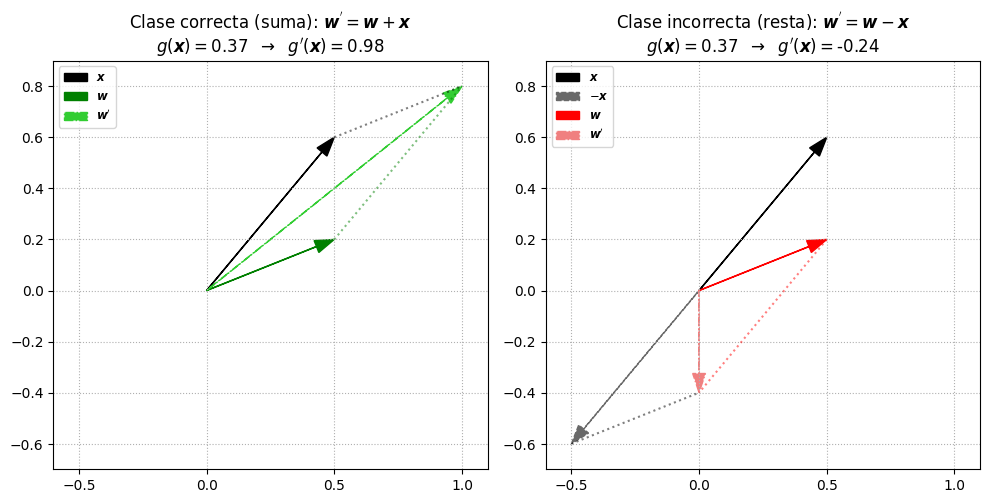

In [67]:
import numpy as np
import matplotlib.pyplot as plt

def plot_percept_update(ax, w_old, x, alpha=1, operation='add'):
    if operation == 'add':
        w_new = w_old + alpha * x
        title = r"Clase correcta (suma): $\boldsymbol{w}^{'} = \boldsymbol{w} + \boldsymbol{x}$"
        color = 'green'
        color_new = 'limegreen'
    else:
        w_new = w_old - alpha * x
        title = r"Clase incorrecta (resta): $\boldsymbol{w}^{'} = \boldsymbol{w} - \boldsymbol{x}$"
        color = 'red'
        color_new = 'lightcoral'

    g_old = np.dot(w_old, x)
    g_new = np.dot(w_new, x)

    ax.arrow(0, 0, x[0], x[1], head_width=0.05, fc='black', ec='black', label=r'$\boldsymbol{x}$', length_includes_head=True)
    if operation != 'add':
        ax.arrow(0, 0, -x[0], -x[1], head_width=0.05, fc='dimgray', ec='dimgray', label=r'$-\boldsymbol{x}$', length_includes_head=True, linestyle='dashed')
    ax.arrow(0, 0, w_old[0], w_old[1], head_width=0.05, fc=color, ec=color, label=r'$\boldsymbol{w}$', length_includes_head=True)
    ax.arrow(0, 0, w_new[0], w_new[1], head_width=0.05, fc=color_new, ec=color_new, label=r'$\boldsymbol{w}^{\prime}$', length_includes_head=True, linestyle='dashdot')
    
    
    if operation == 'add':
         ax.plot([w_old[0], w_new[0]], [w_old[1], w_new[1]], color='green', linestyle='dotted', alpha=0.5)
         ax.plot([x[0], w_new[0]], [x[1], w_new[1]], color='black', linestyle='dotted', alpha=0.5)
    else:
         ax.plot([w_old[0], w_new[0]], [w_old[1], w_new[1]], color='red', linestyle='dotted', alpha=0.5)
         ax.plot([-x[0], w_new[0]], [-x[1], w_new[1]], color='black', linestyle='dotted', alpha=0.5)

    ax.set_title(title + "\n" + r"$g(\boldsymbol{x})=$" + f"${g_old:.2f}$" + r" $\;\to\;$ $g'(\boldsymbol{x})=$" + f"{g_new:.2f}")
    ax.set_xlim(-0.6, 1.1); ax.set_xticks(np.arange(-0.5, 1.5, 0.5))
    ax.set_ylim(-0.7, 0.9)
    ax.grid(True, linestyle=':')
    ax.legend(loc='upper left', fontsize='small')
    ax.set_aspect('equal')

w = np.array([0.5, 0.2])
x = np.array([0.5, 0.6])

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

plot_percept_update(axs[0], w, x, operation='add')
plot_percept_update(axs[1], w, x, operation='subtract')

plt.tight_layout()
plt.show()

**Pseudo-código del Algoritmo Perceptrón:** $\;$ versión básica, con hiperparámetros **margen** $\;b\geq 0$  y **factor de aprendizaje** $\,\alpha>0\,$.
> **Entrada:** $\;$ datos $\;\mathcal{D}=\{(\boldsymbol{x}_n,y_n)\}\quad$ pesos iniciales $\;\{\boldsymbol{w}_c\}\quad$ factor de aprendizaje $\;\alpha\in\mathbb{R}^{>0}\quad$ margen $\;b\in\mathbb{R}^{\geq 0}$

> **Salida:** $\;$ pesos optimizados $\;\{\boldsymbol{w}_c\}$

> `repetir`:

>> `para todo` $\;$ dato $\,\boldsymbol{x}_n$:

>>> *err* = `falso`

>>> `para toda` $\;$ clase $\,c\neq y_n$:

>>>> `si` $\;\boldsymbol{w}_c^t\boldsymbol{x}_n+b>\boldsymbol{w}_{y_n}^t\boldsymbol{x}_n:$

>>>>> $\boldsymbol{w}_c=\boldsymbol{w}_c-\alpha\boldsymbol{x}_n;$ 

>>>>> *err* = `cierto`;

>>>
>>> `si` *err*: 

>>>> $\boldsymbol{w}_{y_n}=\boldsymbol{w}_{y_n}+\alpha\boldsymbol{x}_n$;
>
> `hasta que` $\;$ no quedan muestras mal clasificadas

*Nota: los pesos iniciales $\;\{\boldsymbol{w}_c\}$ pueden ser pesos nulos, pesos inicializados con la media de los vectores de características de la clase, pesos provenientes de un modelo previo entrenado con otros datos, etc. Por defecto, asumiremos que son pesos nulos.*

# 2. Implementación 

En la práctica limitaremos el número de iteraciones del algoritmo, ya que no converge si las clases no son linealmente separables.

In [1]:
import numpy as np
def perceptron(X, y, b=0.1, a=1.0, K=200):
    N, D = X.shape;
    Y = np.unique(y);
    C = Y.size;
    W = np.zeros((1+D, C));
    for k in range(1, K+1):
        E = 0
        for n in range(N):
            xn = np.array([1, *X[n, :]]);
            cn = np.squeeze(np.where(Y==y[n]));
            gn = W[:,cn].T @ xn;
            err = False;
            for c in np.arange(C):
                if c != cn and W[:,c].T @ xn + b >= gn:
                    W[:, c] = W[:, c] - a*xn; 
                    err = True;
            if err:
                W[:, cn] = W[:, cn] + a*xn; 
                E = E + 1;
        if E == 0:
            break
    return W, E, k

**Nota 1:** el carácter `*` delante de una secuencia actúa como [operador de desempaquetado (unpacking operator)]((https://peps.python.org/pep-0448/)).

**Nota 2:** el [operador `@`](https://peps.python.org/pep-0465/) denota multiplicación de matrices.

# 3. Ejemplo

### 3.1 Entrada:

$\quad D=2$

$\quad C=2$ 

$\quad \mathcal{D}=\{\,(\,(0,0),1\,), \; (\,(1,1),2\,)\,\};\;$ entonces:

- $\boldsymbol{x}_1=(0,0)^t$;  $\quad y_1=1$;
- $\boldsymbol{x}_2=(1,1)^t$;  $\quad y_2=2$; 

$\quad\alpha=1$

$\quad b=0.1$

**Visualización del conjunto de datos de entrenamiento:**

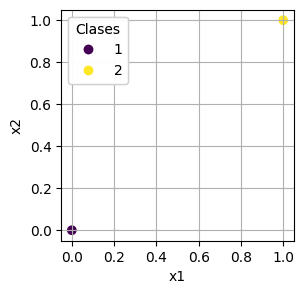

In [2]:
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(3,3));
scatter = ax.scatter([0,1], [0,1], c=[1,2]);
legend = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Clases");
ax.add_artist(legend);
ax.grid();
ax.set_xticks(np.linspace(0., 1, 6)); 
ax.set_yticks(np.linspace(0., 1, 6));
ax.set_xlabel("x1"); ax.set_ylabel("x2");

### 3.2 Traza:

Primero, pasamos $\boldsymbol{x_1}$ y $\boldsymbol{x_2}$ a notación compacta:

$\quad\boldsymbol{x}_1=(0,0)^t$ $\;\to\;$ $\boldsymbol{x}_1=(1,0,0)^t$

$\quad\boldsymbol{x}_2=(1,1)^t$ $\;\to\;$ $\boldsymbol{x}_2=(1,1,1)^t$

Segundo, asumimos pesos iniciales $\{\boldsymbol{w_c}\}$ nulos:

$\boldsymbol{w}_1=(0,0,0)^t$

$\boldsymbol{w}_2=(0,0,0)^t$

Tercero, realizamos la traza del algoritmo perceptrón:

> **Iteración 1**

> **Dato** $\boldsymbol{x}_1 = (1,0,0)^t$, con $y_1 = 1$:

>>> **Clase incorrecta** $\,c = 2$:

>>>> $\;\boldsymbol{w}_2^t\boldsymbol{x}_1+b>\boldsymbol{w}_1^t\boldsymbol{x}_1; \quad (0, 0, 0) \cdot \begin{pmatrix} 1\\ 0\\ 0\end{pmatrix} + 0.1 > (0, 0, 0) \cdot \begin{pmatrix} 1\\ 0\\ 0\end{pmatrix}; \quad 0.1 > 0; \quad  \textbf{True} $

>>>>> **Actualizamos** $\boldsymbol{w}_2$: $\quad \boldsymbol{w}_2=\boldsymbol{w}_2-\alpha\boldsymbol{x}_1 = \begin{pmatrix} 0\\ 0\\ 0\end{pmatrix} - 1 \cdot \begin{pmatrix} 1\\ 0\\ 0\end{pmatrix} = \begin{pmatrix} -1\\ 0\\ 0\end{pmatrix}$

>>> **Actualizamos** $\boldsymbol{w}_1$: $\quad \boldsymbol{w}_1=\boldsymbol{w}_1+\alpha\boldsymbol{x}_1 = \begin{pmatrix} 0\\ 0\\ 0\end{pmatrix} + 1 \cdot \begin{pmatrix} 1\\ 0\\ 0\end{pmatrix} = \begin{pmatrix} 1\\ 0\\ 0\end{pmatrix}$


> **Dato** $\boldsymbol{x}_2 = (1,1,1)^t$, con $y_2 = 2$:

>>> **Clase incorrecta** $\,c = 1$:

>>>> $\;\boldsymbol{w}_1^t\boldsymbol{x}_2+b>\boldsymbol{w}_2^t\boldsymbol{x}_2; \quad (1, 0, 0) \cdot \begin{pmatrix} 1\\ 1\\ 1\end{pmatrix} + 0.1 > (-1, 0, 0) \cdot \begin{pmatrix} 1\\ 1\\ 1\end{pmatrix}; \quad 1.1 > -1; \quad  \textbf{True} $

>>>>> **Actualizamos** $\boldsymbol{w}_1$: $\quad \boldsymbol{w}_1=\boldsymbol{w}_1-\alpha\boldsymbol{x}_2 = \begin{pmatrix} 1\\ 0\\ 0\end{pmatrix} - 1 \cdot \begin{pmatrix} 1\\ 1\\ 1\end{pmatrix} = \begin{pmatrix} 0\\ -1\\ -1\end{pmatrix}$

>>> **Actualizamos** $\boldsymbol{w}_2$: $\quad \boldsymbol{w}_2=\boldsymbol{w}_2+\alpha\boldsymbol{x}_2 = \begin{pmatrix} -1\\ 0\\ 0\end{pmatrix} + 1 \cdot \begin{pmatrix} 1\\ 1\\ 1\end{pmatrix} = \begin{pmatrix} 0\\ 1\\ 1\end{pmatrix}$


> **Iteración 2**

> **Dato** $\boldsymbol{x}_1 = (1,0,0)^t$, con $y_1 = 1$:

>>> **Clase incorrecta** $\,c = 2$:

>>>> $\;\boldsymbol{w}_2^t\boldsymbol{x}_1+b>\boldsymbol{w}_1^t\boldsymbol{x}_1; \quad (0, 1, 1) \cdot \begin{pmatrix} 1\\ 0\\ 0\end{pmatrix} + 0.1 > (0, -1, -1) \cdot \begin{pmatrix} 1\\ 0\\ 0\end{pmatrix}; \quad 0.1 > 0; \quad  \textbf{True} $

>>>>> **Actualizamos** $\boldsymbol{w}_2$: $\quad \boldsymbol{w}_2=\boldsymbol{w}_2-\alpha\boldsymbol{x}_1 = \begin{pmatrix} 0\\ 1\\ 1\end{pmatrix} - 1 \cdot \begin{pmatrix} 1\\ 0\\ 0\end{pmatrix} = \begin{pmatrix} -1\\ 1\\ 1\end{pmatrix}$

>>> **Actualizamos** $\boldsymbol{w}_1$: $\quad \boldsymbol{w}_1=\boldsymbol{w}_1+\alpha\boldsymbol{x}_1 = \begin{pmatrix} 0\\ -1\\ -1\end{pmatrix} + 1 \cdot \begin{pmatrix} 1\\ 0\\ 0\end{pmatrix} = \begin{pmatrix} 1\\ -1\\ -1\end{pmatrix}$


> **Dato** $\boldsymbol{x}_2 = (1,1,1)^t$, con $y_2 = 2$:

>>> **Clase incorrecta** $\,c = 1$:

>>>> $\;\boldsymbol{w}_1^t\boldsymbol{x}_2+b>\boldsymbol{w}_2^t\boldsymbol{x}_2; \quad (1, -1, -1) \cdot \begin{pmatrix} 1\\ 1\\ 1\end{pmatrix} + 0.1 > (-1, 1, 1) \cdot \begin{pmatrix} 1\\ 1\\ 1\end{pmatrix}; \quad -0.9 > 1; \quad  \text{False}$


> **Iteración 3**

> **Dato** $\boldsymbol{x}_1 = (1,0,0)^t$, con $y_1 = 1$:

>>> **Clase incorrecta** $\,c = 2$:

>>>> $\;\boldsymbol{w}_2^t\boldsymbol{x}_1+b>\boldsymbol{w}_1^t\boldsymbol{x}_1; \quad (-1, 1, 1) \cdot \begin{pmatrix} 1\\ 0\\ 0\end{pmatrix} + 0.1 > (1, -1, -1) \cdot \begin{pmatrix} 1\\ 0\\ 0\end{pmatrix}; \quad -0.9 > 1; \quad  \text{False}$

> **Dato** $\boldsymbol{x}_2 = (1,1,1)^t$, con $y_2 = 2$:

>>> **Clase incorrecta** $\,c = 1$:

>>>> $\;\boldsymbol{w}_1^t\boldsymbol{x}_2+b>\boldsymbol{w}_2^t\boldsymbol{x}_2; \quad (1, -1, -1) \cdot \begin{pmatrix} 1\\ 1\\ 1\end{pmatrix} + 0.1 > (-1, 1, 1) \cdot \begin{pmatrix} 1\\ 1\\ 1\end{pmatrix}; \quad -0.9 > 1; \quad  \text{False}$


### 3.3 Salida

Pesos finales (aprendidos):


$\boldsymbol{w}_1=(1,-1,-1)^t$

$\boldsymbol{w}_2=(-1,1,1)^t$

### 3.4 Entrenamiento en Python:

In [3]:
X = np.array([[0, 0], [1, 1]])
y = np.array([0, 1], dtype=int)
W, E, k = perceptron(X, y)
print("w1 =", W[:,0].T, "  w2 =", W[:,1].T, "  E =", E, "  k =", k)

w1 = [ 1. -1. -1.]   w2 = [-1.  1.  1.]   E = 0   k = 3


### 3.5 Frontera de decisión:

$$g_1(\boldsymbol{x}) = g_2(\boldsymbol{x});$$

$$\boldsymbol{w}_1(1, x_1, x_2)^t=\boldsymbol{w}_2(1, x_1, x_2)^t;$$

$$(1, -1, -1)(1, x_1, x_2)^t=(-1,1,1)(1, x_1, x_2)^t;$$

$$x_2=-x_1+1$$

### 3.6 Regiones de decisión (heatmap):

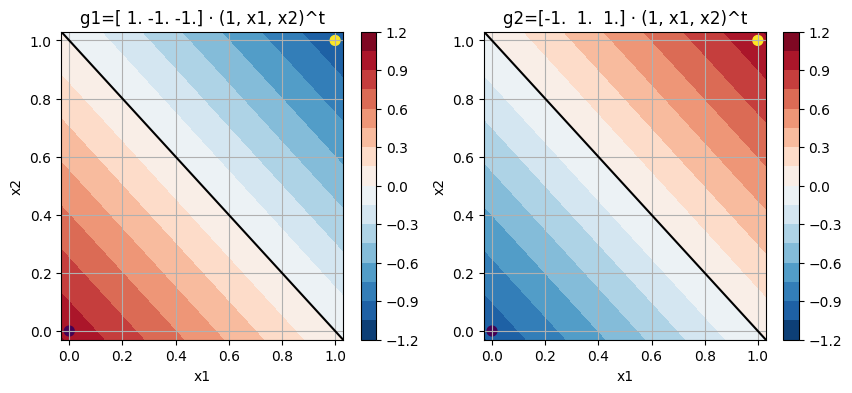

In [11]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([[0, 0], [1, 1]]).astype(float);
y = np.array([1, 2]).astype(int);
x1, x2 = np.meshgrid(np.linspace(-.03, 1.03, 50), np.linspace(-.03, 1.03, 50));
XX = np.c_[np.ravel(x1), np.ravel(x2)];
Wt = np.array([[1, -1, -1], [-1, 1, 1]]).astype(float);
gg = lambda x: (Wt[0, 0] + Wt[0, 1:] @ x, Wt[1, 0] + Wt[1, 1:] @ x);
GG = np.apply_along_axis(gg, 1, XX);
_, axs = plt.subplots(1, 2, figsize=(10, 4));
for i, ax in enumerate(axs.flat):
    ax.set_xticks(np.linspace(0., 1, 6)); 
    ax.set_yticks(np.linspace(0., 1, 6));
    ax.grid(); 
    ax.set_xlabel("x1"); ax.set_ylabel("x2");
    ax.set_title(f'g{i+1}={W[:,i]} · (1, x1, x2)^t');
    cp = ax.contourf(x1, x2, GG[:, i].reshape(x1.shape), 15, cmap='RdBu_r');
    plt.colorbar(cp, ax=ax); 
    ax.scatter(*X.T, c=y, s=50);
    ax.plot([-1,2],[2,-1], color="black");
    ax.set_xlim(-0.03,1.03);
    ax.set_ylim(-0.03,1.03);

# 4. Convergencia y calidad de la solución

**Convergencia:** $\;$ Perceptrón converge (deja de iterar) si los datos son **linealmente separables**.

**Efecto del factor de aprendizaje $\alpha>0$:** $\;$ converge con independencia del valor elegido, aunque lentamente si $\alpha$ es muy pequeño.

**Efecto del margen $b\geq 0$:** $\;$ converge con fronteras centradas si elegimos un valor próximo al máximo margen que permite discriminar linealmente las muestras con margen. Si nos pasamos, Perceptrón no converge.
* Hay que hacer experimentos con diferentes valores del margen $b$ para encontrar un valor que generalice óptimamente.